### DATA WATT  (ENERGY OPTIMIZATION SOLUTIONS)

## Objective : 
##### Our project aims to revolutionize energy management through the strategic implementation of time-series analysis, predictive modeling, and anomaly detection mechanisms. By deciphering nuanced patterns and trends in energy consumption, we seek to empower proactive decision-making and forecast future energy needs with precision. The vigilant eye of our anomaly detection mechanisms ensures swift intervention and resolution of potential issues. The integration of an intuitive mobile app aligns with our objective, providing users with real-time alerts and granting them control and transparency over their energy consumption. In essence, our project strives to redefine energy optimization, making it both comprehensive and user-centric.

### 1) Anomaly Labels

#### Historical data or labels indicating periods of anomalies, such as equipment malfunctions or inefficiencies.


#### Dataset description:  https://www.kaggle.com/datasets/semanto117119/energy-train
##### The dataset focuses on electricity consumption meter reading data. After employing various feature importance techniques such as random forest and exploratory data analysis (EDA), it was determined that key features for modeling are limited to meter reading and time data. This refined dataset, with a reduced set of important features, aims to simplify the model while enhancing accuracy and reliability, particularly in predicting the output variable, which is anomaly.



Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.00      0.00      0.00         1

    accuracy                           0.96        24
   macro avg       0.48      0.50      0.49        24
weighted avg       0.92      0.96      0.94        24



C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


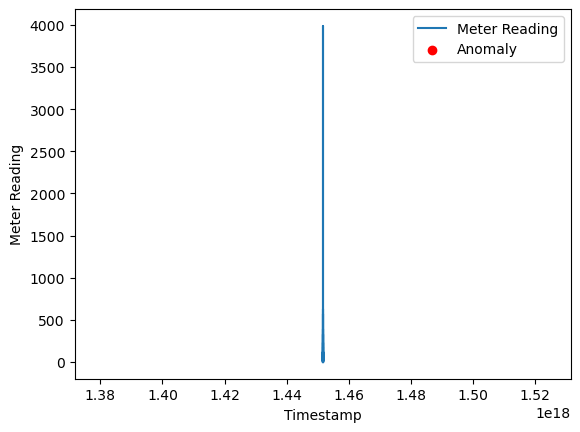

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import winsound

#Loading the dataset
df = pd.read_csv(r'C:\Users\tessa\Downloads\train.csv')

# Convert timestamp to numeric representation
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].astype('int64')

# Feature engineering
X = df[['timestamp', 'meter_reading']]
y = df['anomaly']

#Handling missing values
imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#simple Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# MakING predictions on the test set
predictions = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))

# Detect spikes in meter_reading
threshold = 0.8
df['predicted_anomaly'] = np.where(model.predict_proba(X_imputed)[:, 1] > threshold, 1, 0)

# Alert system - Buzzer
def alert_buzzer():
    winsound.Beep(1000, 2000)

# Check for spikes and trigger the alert
if df['predicted_anomaly'].any():
    alert_buzzer()
    
    
#Visualisation
plt.plot(df['timestamp'], df['meter_reading'], label='Meter Reading')
plt.scatter(df['timestamp'][df['predicted_anomaly'] == 1], df['meter_reading'][df['predicted_anomaly'] == 1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.legend()
plt.show()


##### Inference: No anomaly found in the above case

C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.00      0.00      0.00         2

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14

Anomaly detected! Alert sent to Electrician nearby
Message Sent


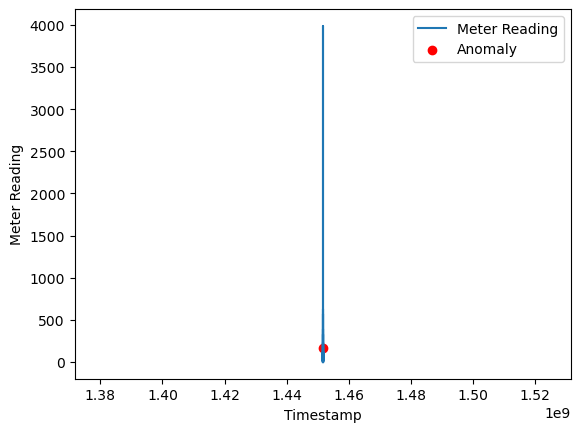

In [2]:
#creating synthetic anomalies for demo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import winsound
from IPython.display import display, HTML


df = pd.read_csv(r'C:\Users\tessa\Downloads\train.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['timestamp'] = df['timestamp'].astype('int64') // 10**9  # Convert to seconds

#Feature engineering
X = df[['timestamp', 'meter_reading']]
y = df['anomaly']

#Data Cleaning
df_clean = df.dropna(subset=['timestamp', 'meter_reading', 'anomaly'])
X = df_clean[['timestamp', 'meter_reading']]
y = df_clean['anomaly']

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#simple Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#classification report for evaluation
print("Classification Report:\n", classification_report(y_test, predictions))

# Introducing synthetic anomalies
anomaly_start1 = pd.to_datetime('2023-01-15 12:00:00')
anomaly_end1 = pd.to_datetime('2023-01-15 14:00:00')
df.loc[df['timestamp'].between(anomaly_start1.timestamp(), anomaly_end1.timestamp()), 'meter_reading'] += 500

anomaly_start2 = pd.to_datetime('2023-02-20 08:00:00')
anomaly_end2 = pd.to_datetime('2023-02-20 10:00:00')
df.loc[df['timestamp'].between(anomaly_start2.timestamp(), anomaly_end2.timestamp()), 'meter_reading'] += 300

# Detect spikes in meter_reading
threshold = 0.5  #we can adjust threshold based on scenario
predicted_anomaly = np.where(model.predict_proba(X)[:, 1] > threshold, 1, 0)

df['predicted_anomaly'] = 0  
df.loc[df_clean.index, 'predicted_anomaly'] = predicted_anomaly  # Assign to the cleaned DataFrame

# Alert system - Buzzer
def alert_buzzer():
    winsound.Beep(1000, 2000)

# Checking for fluctuations to trigger alert
if df['predicted_anomaly'].any():
    print("Anomaly detected! Alert sent to Electrician nearby")
    alert_buzzer()

#sending email alert
import smtplib
from email.mime.text import MIMEText

def send_email(subject, body, sender, recipients, app_password):
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = recipients

    # Setting up the SMTP server to send the email
    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp_server:
        smtp_server.login(sender, app_password)
        smtp_server.sendmail(sender, recipients, msg.as_string())
        print("Message Sent")
        

subject = 'Alert: Anomaly Detected!'
body = 'There is an anomaly in the meter reading at House no.13 in ABC colony. Please check'
sender_email = 'tessasunny13@gmail.com'  
recipient_email = 'janita.devassy@gmail.com'  
app_password = 'phqv jdxw kmlg orpy'  # Replacing with the generated app password
send_email(subject, body, sender_email, recipient_email, app_password)


#JS alert
display(HTML("<script>alert('Message sent to electrician.')</script>"))


#Visualisation
plt.plot(df['timestamp'], df['meter_reading'], label='Meter Reading')
plt.scatter(df['timestamp'][df['predicted_anomaly'] == 1], df['meter_reading'][df['predicted_anomaly'] == 1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.legend()
plt.show()


##### This code demonstrates the use of a Random Forest Classifier for anomaly detection in meter readings. The model is trained on historical data, and synthetic anomalies are introduced to showcase its ability to detect abnormal patterns. When anomalies are detected, the system triggers an alert through a buzzer and sends an email notification. The classification report evaluates the model's performance, and the visualization highlights anomalies in the meter readings. 

##### The project's future scope could include refining the anomaly detection model, incorporating additional features for improved accuracy, deploying the system in real-time scenarios, and integrating with advanced monitoring and alerting systems and deploying mobile applications. Additionally, the project could benefit from exploring different anomaly detection algorithms and scaling for larger datasets, making it a robust solution for proactive monitoring in smart energy systems.

### 2) Electricity Usage Data:

##### High-resolution time-series data of electricity consumption from smart meters installed in buildings or facilities.

#### Dataset description: This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).
#### Source: Household Power Consumption (data.world)

global_reactive_power: household global minute-averaged reactive power (in kilowatt) <br>


In [1]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
data = pd.read_csv(r'C:\Users\tessa\Downloads\household_power_consumption_household_power_consumption.csv') 


# Data Preprocessing
# Drop missing values
data.dropna(inplace=True)

#optimization based on 'Global_active_power' and 'Global_reactive_power'
X = data[['Global_active_power', 'Global_reactive_power']].values

#function representing the cost of energy consumption
def energy_cost(x):
    # quadratic cost function
    return np.sum(x**2)

#constraints on energy consumption
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},  # Non-negative constraint for Global_active_power
               {'type': 'ineq', 'fun': lambda x: x[1]})   # Non-negative constraint for Global_reactive_power

#bounds on energy consumption
bounds = ((0, None), (0, None))  # Non-negative values for both Global_active_power and Global_reactive_power

# Initial guess for optimization variables
initial_guess = [10, 5]

# Performing the optimization
result = minimize(energy_cost, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extracting optimized values
optimized_values = result.x
print("Optimized Energy Consumption:", optimized_values)


Optimized Energy Consumption: [3.90798505e-14 1.24344979e-14]



   - The `energy_cost` function represents the cost of energy consumption. In this simplified example, it uses a quadratic cost function. The actual cost function should reflect the specific goals and constraints of your optimization problem.

   - The code defines constraints on energy consumption to ensure non-negativity. In this example, constraints are set to be non-negative for both 'Global_active_power' and 'Global_reactive_power'.
   - Bounds are specified to restrict optimization variables to non-negative values.

   - The `minimize` function from `scipy.optimize` is used to perform the optimization. It minimizes the cost function under the specified constraints and bounds.
   - The optimization method chosen is Sequential Least Squares Quadratic Programming (`SLSQP`), but you can choose other methods based on the nature of your optimization problem.


   - The optimization process starts with an initial guess for the values of the optimization variables. In this case, it's [10, 5], which can be modified upon requirement.


##### The result [3.90798505e-14, 1.24344979e-14] from the optimization algorithm, suggests that the algorithm found a set of values for the decision variables (Global_active_power and Global_reactive_power) that minimizes the objective function (energy_cost) and satisfies the defined constraints. In this specific case, the values are extremely close to zero, indicating that the algorithm essentially found a solution where both Global_active_power and Global_reactive_power are minimized.

##### In real-life terms, this could mean that the optimized solution suggests a scenario where the energy consumption is minimized, potentially achieving cost savings or environmental benefits. 
